In [12]:
from typing import List, Tuple

import spacy

In [2]:
text = '私は東京でご飯を食べます。'
nlp = spacy.load('ja_ginza') # use ginza
for word in nlp(text):
    print(word, word.lemma_, word.tag_, word.pos_)
print('DONE')

私 私 代名詞 PRON
は は 助詞-係助詞 ADP
東京 東京 名詞-固有名詞-地名-一般 PROPN
で で 助詞-格助詞 ADP
ご飯 ご飯 名詞-普通名詞-一般 NOUN
を を 助詞-格助詞 ADP
食べ 食べる 動詞-一般 VERB
ます ます 助動詞 AUX
。 。 補助記号-句点 PUNCT
DONE


In [3]:
class Analyzer:
    def __init__(self) -> None:
        self._nlp = spacy.load('ja_ginza')
    
    def __call__(self, text: str) -> List[str]:
        results = []
        for word in self._nlp(text):
            if word.tag_.startswith('名詞'):
                results.append(word.lemma_)
        return results

In [4]:
analyzer = Analyzer()

In [5]:
print(analyzer(text))

['東京', 'ご飯']


In [6]:
from glob import glob

In [19]:
def load_texts(paths: List[str]) -> List[str]:
    texts = []
    for p in paths:
        with open(p, 'rt') as f:
            text = f.read()
            texts.append(text)
    return texts

In [25]:
it_paths = glob('text/it-life-hack/*.txt')
it_texts = load_texts(it_paths)
it_tokens = list(map(analyzer, it_texts[:20]))

In [26]:
kaden_paths = glob('text/kaden-channel/*.txt')
kaden_texts = load_texts(kaden_paths)
kaden_tokens = list(map(analyzer, kaden_texts[:20]))

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [56]:
print(len(it_texts))
print(len(kaden_texts))

871
865


In [57]:
n = 100

In [58]:
vectorizer = TfidfVectorizer(analyzer=analyzer)
X = vectorizer.fit_transform(it_texts[:n] + kaden_texts[:n])

In [59]:
y = []

In [60]:
model = TSNE(n_components=2)
X_embed = model.fit_transform(X)

In [61]:
import matplotlib.pyplot as plt

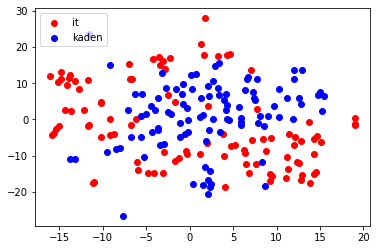

In [62]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_embed[:n, 0], X_embed[:n, 1], color='red', label='it')
ax.scatter(X_embed[n:, 0], X_embed[n:, 1], color='blue', label='kaden')
ax.legend(loc='upper left')
plt.show()